# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [37]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pylab as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Regression Model Evaluation

In [25]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [26]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
corr=data.corr()   # correlation matrix

corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


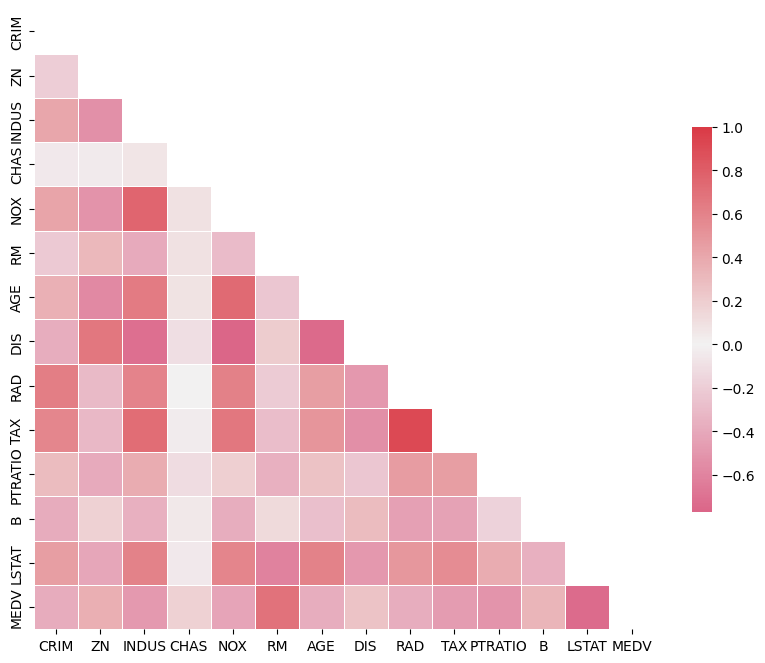

In [28]:
fig, ax=plt.subplots(figsize=(10,10))


mask=np.triu(np.ones_like(corr, dtype=bool))           # mask for superior triangular matrix


color_map=sns.diverging_palette(0, 10, as_cmap=True)   # color palette


# correlation heatmap
sns.heatmap(corr,                       # data
            mask=mask,                  # white mask
            cmap=color_map,             # color
            vmax=1,                     # vertical edge
            center=0,                   # plot center
            square=True,                # data square representation
            linewidth=.5,               # linewidth
            cbar_kws={'shrink': .5},    # lateral bar legend
            ax=ax                       # axes for plot size
           );

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [29]:
from sklearn.model_selection import train_test_split as tts

X = data.drop(["MEDV"], axis=1)
y = data["MEDV"] 

In [30]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
from sklearn.linear_model import LinearRegression as LinReg
LinReg = LinReg()
LinReg.fit(X_train, y_train)



LinearRegression()

In [35]:
y_predict = LinReg.predict(X_test)

In [36]:
y_prueba_predict=LinReg.predict(X_train)

In [41]:
#confusion_matrix(y_test,y_predict) #me salta error porque es una variable continua, tiene sentido pero quería ver

## 3. Calculate and print R-squared for both the training and the testing set.

In [42]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_predict) #bastante bien tira esto

0.6687594935356327

In [44]:
r2(y_train, y_prueba_predict) #sustancialmente más, claro, se lo sabe más de memoria

0.7508856358979672

## 4. Calculate and print mean squared error for both the training and the testing set.

In [47]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_predict) #un poco peor con los casos que no conoce, es lógico

24.291119474973467

In [49]:
mse(y_train, y_prueba_predict)

21.641412753226316

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [50]:
from sklearn.metrics import mean_absolute_error as mae  

mae(y_test, y_predict)

3.1890919658878363

In [51]:
mae(y_train, y_prueba_predict)

3.314771626783231

## Classification Model Evaluation

In [52]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [68]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [55]:
X = data.drop("class", axis=1)
y = data["class"]

In [71]:
X.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
5.8                2.7               5.1                1.9                 2
6.2                2.2               4.5                1.5                 1
                   2.9               4.3                1.3                 1
                   3.4               5.4                2.3                 1
6.3                2.3               4.4                1.3                 1
                                                                           ..
5.4                3.9               1.3                0.4                 1
                                     1.7                0.4                 1
5.5                2.3               4.0                1.3                 1
                   2.4               3.7                1.0                 1
7.9                3.8               6.4                2.0                 1
Length: 149, dtype: int64

In [70]:
y.value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [76]:
from sklearn.linear_model import LogisticRegression 

logreg=LogisticRegression()


In [77]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [81]:
pred_tr = logreg.predict(X_train)
pred = logreg.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [82]:
from sklearn.metrics import accuracy_score as acc

print(acc(y_train, pred_tr))
print(acc(y_test, pred))

0.975
1.0


In [100]:
help(acc)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

## 10. Calculate and print the precision score for both the training and the testing set.

In [101]:
from sklearn.metrics import precision_score as prec

prec(y_test, pred,average="macro" )

1.0

In [104]:
prec(y_train, pred_tr, average="macro") 

0.9761904761904763

## 11. Calculate and print the recall score for both the training and the testing set.

In [106]:
from sklearn.metrics import recall_score as rec

rec(y_test, pred,average= 'macro') , rec(y_train, pred_tr,average= 'macro')

(1.0, 0.975609756097561)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [108]:
from sklearn.metrics import f1_score as f1

print(f1(y_test, pred, average="macro"))
print(f1(y_train, pred_tr, average="macro"))

1.0
0.9749960931395533


## 13. Generate confusion matrices for both the training and the testing set.

In [109]:
from sklearn.metrics import confusion_matrix as cm


cm(y_test, pred)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [110]:
cm(y_train, pred_tr)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.